In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\Hetvi Mehta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
Train=pd.read_csv("C:/Users/Hetvi Mehta/Desktop/insofe/house-price-advanced-regression-techniques/train.csv")

In [3]:
Test=pd.read_csv("C:/Users/Hetvi Mehta/Desktop/insofe/house-price-advanced-regression-techniques/test.csv")

In [4]:
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
Train.shape

(1460, 81)

In [7]:
Test.shape

(1459, 80)

In [8]:
null_columns=Train.columns[Train.isnull().any()]
Train[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

(array([ 16.,  74., 184., 345., 252., 199., 125.,  85.,  61.,  38.,  27.,
         15.,  14.,   8.,   6.,   2.,   1.,   1.,   2.,   1.,   2.,   0.,
          0.,   0.,   2.]),
 array([ 34900.,  63704.,  92508., 121312., 150116., 178920., 207724.,
        236528., 265332., 294136., 322940., 351744., 380548., 409352.,
        438156., 466960., 495764., 524568., 553372., 582176., 610980.,
        639784., 668588., 697392., 726196., 755000.]),
 <a list of 25 Patch objects>)

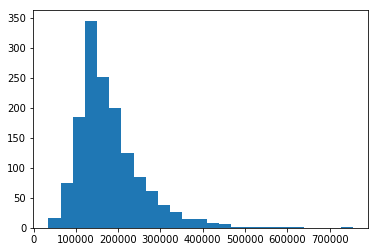

In [9]:
plt.hist(Train.SalePrice, bins = 25)

(array([  4.,   1.,   0.,   5.,   7.,   6.,  26.,  45.,  47., 114., 165.,
        215., 172., 199., 119., 109.,  88.,  52.,  35.,  26.,  12.,   5.,
          4.,   2.,   2.]),
 array([10.46024211, 10.58321134, 10.70618058, 10.82914982, 10.95211906,
        11.07508829, 11.19805753, 11.32102677, 11.443996  , 11.56696524,
        11.68993448, 11.81290371, 11.93587295, 12.05884219, 12.18181142,
        12.30478066, 12.4277499 , 12.55071913, 12.67368837, 12.79665761,
        12.91962684, 13.04259608, 13.16556532, 13.28853455, 13.41150379,
        13.53447303]),
 <a list of 25 Patch objects>)

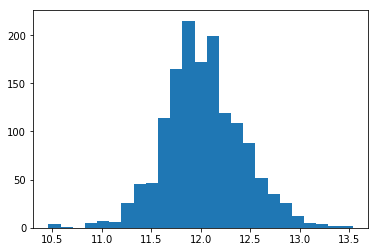

In [10]:
plt.hist(np.log(Train.SalePrice), bins = 25)

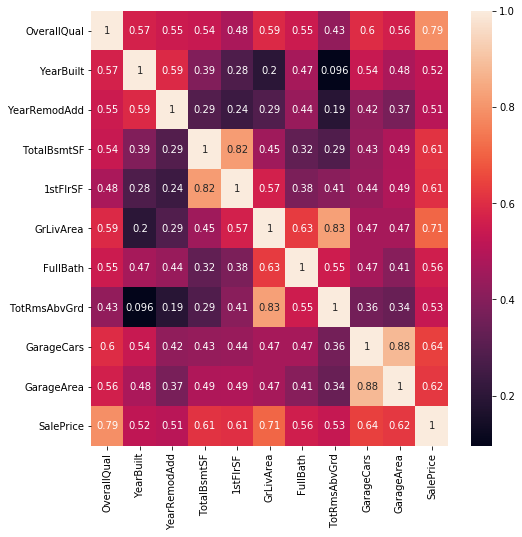

In [11]:
# Select columns with a correlation > 0.5
corr = Train.corr()

rel_vars = corr.SalePrice[(corr.SalePrice > 0.5)]
rel_cols = list(rel_vars.index.values)

corr= Train[rel_cols].corr()
plt.figure(figsize=(8,8))
hm = sns.heatmap(corr, annot=True, annot_kws={'size':10})
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

In [12]:
Train_Y = Train.SalePrice

In [13]:
predictor_cols = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]

In [14]:
Train_X = Train[predictor_cols]

In [15]:
#X_train,X_val,Y_train,Y_val=train_test_split(Train_X,Train_Y,test_size=0.2,random_state=100)

In [16]:
Test_X = Test[predictor_cols]

In [17]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\Hetvi Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
RFmodel = RandomForestRegressor()
RFmodel.fit(Train_X,Train_Y)
y_pred = RFmodel.predict(Test_X)  

In [19]:
#predicted_prices = RFmodel.predict(Test_X)

In [20]:
print(y_pred)

[131675.  148180.  191210.  ... 163578.2 119250.  233050. ]


In [21]:
#val_preds = RFmodel.predict(Test_X)

In [22]:
my_submission = pd.DataFrame({'Id': Test.Id, 'SalePrice': y_pred})

In [24]:
my_submission.to_csv('submission2.csv', index=False)